In [ ]:
!pip install mdptoolbox-hiive

In [3]:
#import mdptoolbox.example
import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
import numpy as np
import pandas as pd

#import hiive.mdptoolbox, hiive.mdptoolbox.example
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
def vi_plot(result):
    errors = [i['Error'] for i in result]
    vi_re = [i['Reward'] for i in result]
    mean_re = [i['Mean V'] for i in result]
    ax1 = plt.subplot(131)
    plt.plot(errors)
    
    ax1.set_title('error')
    # share x only
    ax2 = plt.subplot(132)
    plt.plot(vi_re)
    # make these tick labels invisible
    
    ax2.set_title('rewards')
    ax3 = plt.subplot(133)
    plt.plot(mean_re)
    # make these tick labels invisible
    ax3.set_title('Mean V')
    plt.plot()
    #plt.title('MDP result')
    return result,errors,vi_re

In [ ]:
gamma = 0.999999996

pi = mdp.PolicyIteration(P, R, gamma)
pi.setVerbose()
pi_result,pi_error,pi_reward = vi_plot(pi)

In [ ]:
P, R = example.forest(S=400, r1=400, r2=200, p=0.1, is_sparse=False)

In [ ]:
gamma = 0.999999996

pi = mdp.PolicyIteration(P, R, gamma)
pi.setVerbose()
pi_result,pi_error,pi_reward = vi_plot(pi)
sum(pi.policy)

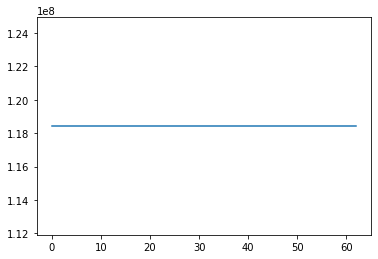

In [ ]:
plt.plot([i['Max V'] for i in pi_result])

In [ ]:
len(pi.V)

400

Text(0.5, 1.0, 'Gamma vs Iteration')

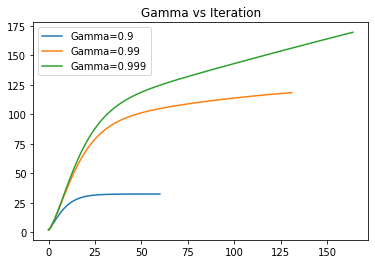

In [ ]:
re = [100,-0,-0]
gamma = [0.9,0.99,0.999]
#pp,rr = get_PR(gym_p,env,re)
results =[]
for g in gamma:
    vi = mdp.ValueIteration(P,R,g)
    result = vi.run()
    results.append([i['Mean V'] for i in result])
    plt.plot([i['Mean V'] for i in result],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Gamma vs Iteration')

In [ ]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
gamma = 0.999999996
vi = mdp.ValueIteration(P, R, gamma, epsilon=0.001,max_iter = 100000)
vi.setVerbose()
result,error,reward = vi_plot(vi)
sum(vi.policy)

In [ ]:
pi.policy

In [ ]:
sum([pi.policy[i] == vi.policy[i] for i in range(400)])

400

190

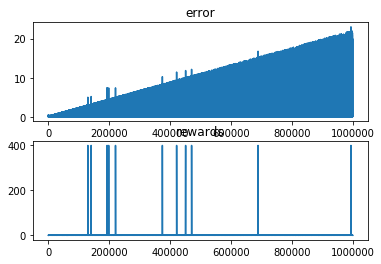

In [ ]:
n_iter = 1000000
gamma = 0.999999996
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.99,epsilon_min=0.1,
                   alpha_decay=0.999,alpha = 0.1,alpha_min=0.01
                   ,run_stat_frequency=1)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)
sum(ql.policy)

333
701.9699947834015


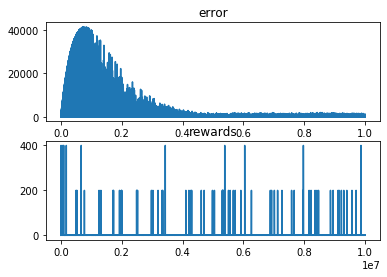

In [ ]:
import time
start = time.time()
n_iter = 10000000
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=100)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)
print(sum(ql.policy))
print(time.time()-start)

320
821.8197267055511


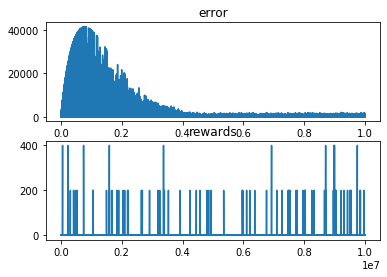

In [ ]:
import time
start = time.time()
n_iter = 10000000
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=100)
ql.setVerbose()
ql_run = ql.run()
ql_result,ql_error,ql_reward = vi_plot(ql_run)
print(sum(ql.policy))
print(time.time()-start)

In [ ]:
ql.policy

In [ ]:
ql.max_iter

10000000

In [ ]:
pd.DataFrame(ql.V).to_pickle('q_v.pkl')

In [ ]:
len(ql_result)

10000000

In [ ]:
pd.DataFrame(ql_result).to_pickle('ql_result.pkl')

In [ ]:
ql_result = pd.read_pickle('../../ql_result.pkl')

In [ ]:
ql_result.shape

(10000000, 11)

In [ ]:
0.9999**(5000000/1000)

0.006721111959865588

8

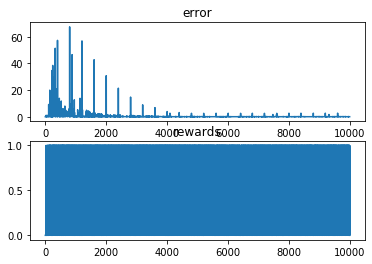

In [ ]:
n_iter = 10000
ql = mdp.QLearning(P, R, 0.99995 , n_iter=n_iter,
                   epsilon=0.1,epsilon_decay=0.99,epsilon_min=0.1,
                   alpha_decay=0.99,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=10)
ql.setVerbose()
qresult = ql.run()
ql_result,ql_error,ql_reward = vi_plot(qresult)
sum(ql.policy)

Text(0.5, 1.0, 'Sub-optimal Converged QL')

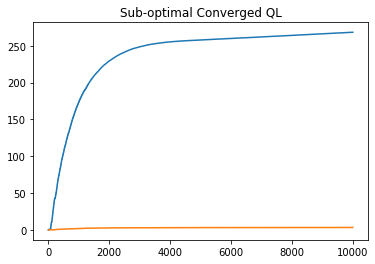

In [ ]:
plt.plot([i['Max V'] for i in ql_result])
plt.plot([i['Mean V'] for i in ql_result])
plt.title('Sub-optimal Converged QL')

63

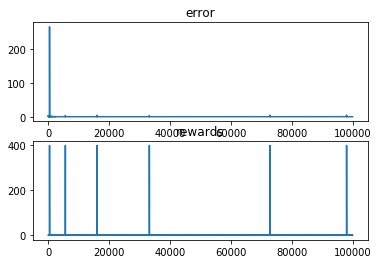

In [ ]:
n_iter = 100000
gamma = 0.9
ql_test = mdp.QLearning(P, R, gamma , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.99,epsilon_min=0.1,
                   alpha_decay=0.999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1)
#ql.setVerbose()

result_test = ql_test.run()
res,_,_ = vi_plot(result_test)
#_ = vi_plot(result_test)
sum(ql_test.policy)

In [ ]:
print('hhelo')

hhelo


In [ ]:
import time
start = time.time()
n_iter = 10000000
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=100)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)
print(sum(ql.policy))
print(time.time()-start)

In [ ]:
0.999**400

0.6701859060067401

In [ ]:
0.9**400

4.977414122938541e-19

In [ ]:
0.95**400

1.2286894111517744e-09

In [ ]:
n_iter = 100000
gamma = 0.95
epsilon_decay = [0.9,0.95,0.99]
ep_decay_result = []
for ed in epsilon_decay:
    ql_test = mdp.QLearning(P, R, gamma , n_iter=n_iter,
                   epsilon=1,epsilon_decay=ed,epsilon_min=0.1,
                   alpha_decay=0.999,alpha = 0.1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=1)
#ql.setVerbose()

    result_test = ql_test.run()
    #res,_,_ = vi_plot(result_test)
    ep_decay_result.append([i['Mean V'] for i in result_test])
#_ = vi_plot(result_test)

Text(0.5, 1.0, 'Mean V vs Decay')

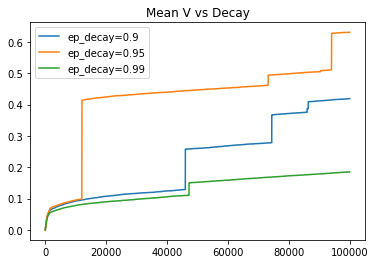

In [ ]:
for i in range(3):
    plt.plot(ep_decay_result[i],label='ep_decay='+str(epsilon_decay[i]))
plt.legend(loc='best')
plt.title('Mean V vs Decay')#n_iter= 1000000

In [ ]:
n_iter = 100000
gamma = 0.95
epsilon_decay = [0.9,0.95,0.99]
alphas = [1,0.5,0.1]
ep_decay_result = []
for a in alphas:
    ql_test = mdp.QLearning(P, R, gamma , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.95,epsilon_min=0.1,
                   alpha_decay=0.999,alpha = a,alpha_min=0.01
                   ,run_stat_frequency=None,decay_every=1)
#ql.setVerbose()

    result_test = ql_test.run()
    #res,_,_ = vi_plot(result_test)
    ep_decay_result.append([i['Mean V'] for i in result_test])
#_ = vi_plot(result_test)

Text(0.5, 1.0, 'Forest Mean V vs Alpha')

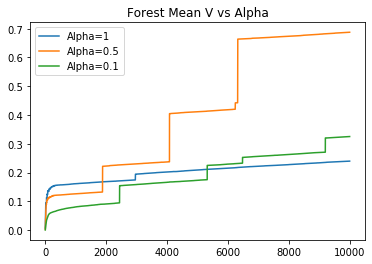

In [ ]:
for i in range(3):
    plt.plot(ep_decay_result[i],label='Alpha='+str(alphas[i]))
plt.legend(loc='best')
plt.title('Forest Mean V vs Alpha')#n_iter= 1000000

Text(0.5, 1.0, 'Forest Q learning Epsilon vs Iteration')

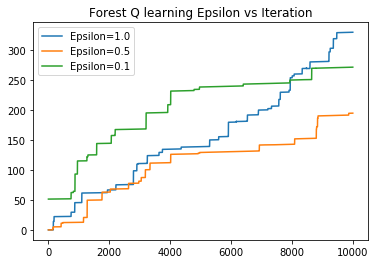

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for a in alpha:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=e,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='ALpha='+str(a))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Epsilon vs Iteration')

Text(0.5, 1.0, 'Forest Q learning Epsilon vs Iteration')

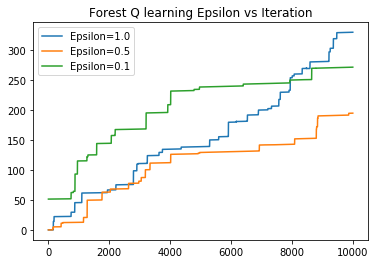

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for e in epsilon:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=e,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Epsilon vs Iteration')

Text(0.5, 1.0, 'Forest Q learning Epsilon vs Iteration')

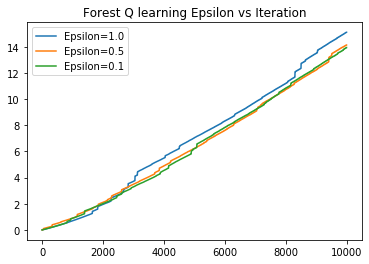

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for e in epsilon:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(P, R, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=e,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Epsilon vs Iteration')

Text(0.5, 1.0, 'Forest Q learning Alpha vs Iteration')

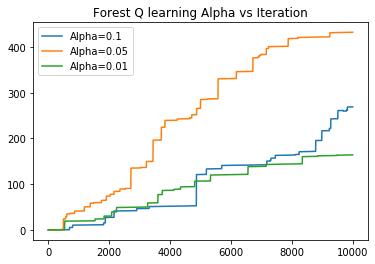

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [0.1,0.05,0.01]
epsilon = [1.0,0.5,0.1]
#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for a in alpha:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=1,
                       alpha_decay=0.99,alpha=a,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Alpha='+str(a))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Alpha vs Iteration')

Text(0.5, 1.0, 'Forest Q learning Alpha vs Iteration')

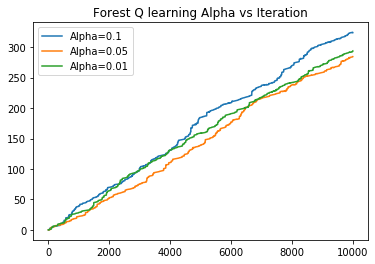

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [0.1,0.05,0.01]
epsilon = [1.0,0.5,0.1]
#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for a in alpha:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=1,
                       alpha_decay=0.99,alpha=a,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Alpha='+str(a))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Alpha vs Iteration')

Text(0.5, 1.0, 'Forest Q learning Epsilon Decay vs Iteration')

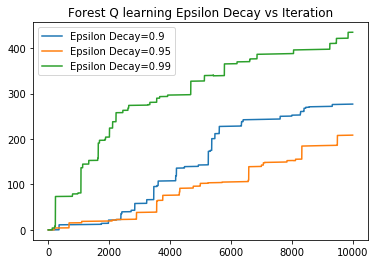

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [0.1,0.05,0.01]
epsilon = [1.0,0.5,0.1]
epsilon_decay = [0.9,0.95,0.99]

#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for e in epsilon_decay:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=e,epsilon_min=0.001,epsilon=1,
                       alpha_decay=0.99,alpha=1.0,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon Decay='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Epsilon Decay vs Iteration')

Text(0.5, 1.0, 'Forest Q learning Gamma vs Iteration')

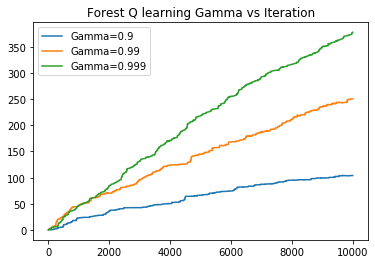

In [ ]:
gamma = [0.9,0.99,0.999]
alpha = [0.1,0.05,0.01]
epsilon = [1.0,0.5,0.1]
epsilon_decay = [0.9,0.95,0.99]

#pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 500000
for g in gamma:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = g , n_iter=n_iter,epsilon_decay=0.99,epsilon_min=0.001,epsilon=1,
                       alpha_decay=0.99,alpha=1.0,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Forest Q learning Gamma vs Iteration')

In [ ]:
np.mean(ep_decay_result[1])

2096.042126620864

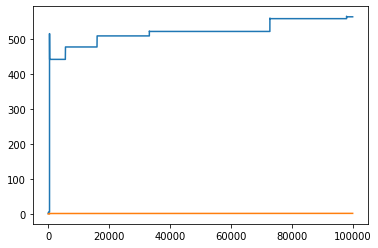

In [ ]:
plt.plot([i['Max V'] for i in result_test])
plt.plot([i['Mean V'] for i in result_test])

In [ ]:
len(ep_decay_result[0])

10000000

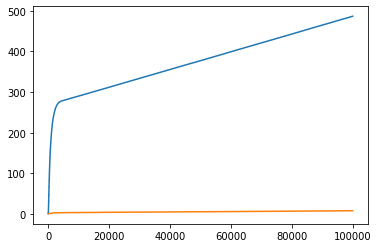

In [ ]:
plt.plot([i['Max V'] for i in result_test])
plt.plot([i['Mean V'] for i in result_test])

Text(0.5, 1.0, 'Converged QL')

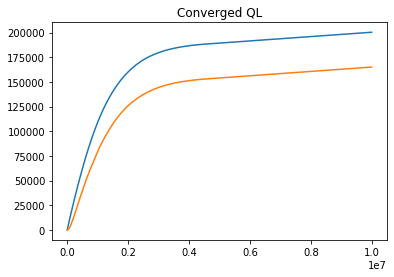

In [ ]:
plt.plot([i['Max V'] for i in ql_result])
plt.plot([i['Mean V'] for i in ql_result])
plt.title('Converged QL')

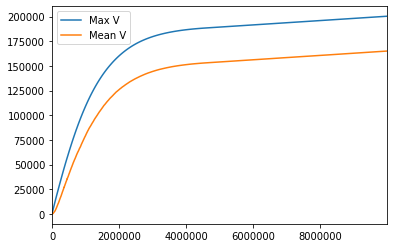

In [ ]:
aa = ql_result.loc[:,['Max V','Mean V']]
aa.plot()

In [ ]:
sum(ql_test.policy)

171

In [ ]:
plt.plot([i['Max V'] for i in result_test])

In [ ]:
sum(ql.policy)

333

In [ ]:
sum(vi.policy)

336

In [ ]:
sum([ql.policy[i] == vi.policy[i] for i in range(400)])

293

## tuning ql hp

In [ ]:
gamma = [0.9,0.99,0.999]
epsilon = [1,0.5,0.1]
alpha =  [1,0.1]


In [ ]:
import pandas as pd

In [ ]:
qlp = pd.DataFrame(ql.policy)

In [ ]:
ql_result[0]

{'State': 265,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 0.012967109680175781,
 'Alpha': 0.9056978449586682,
 'Epsilon': 0.36972963764972655,
 'Gamma': 0.999999996,
 'Max V': 16.44970280149264,
 'Mean V': 0.15194856418021915,
 'Iteration': 100}

In [ ]:
states = [i['State'] for i in ql_result]
states = pd.DataFrame(states)

In [ ]:
sum(ql.policy)

189

In [ ]:
sum([vi.policy[i]==ql.policy[i] for i in range(400)])

221

In [ ]:
a

0.1

In [ ]:
e

1

In [ ]:
states.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
set(range(400))-set([i['State'] for i in ql_result])

set()

In [ ]:
ql.policy[-10:]

(1, 1, 1, 0, 0, 0, 1, 0, 0, 0)

In [ ]:
ql.V

(2412.1380188947896,
 2412.6273544081682,
 2401.6712819404247,
 2162.998136651427,
 660.2511512157654,
 363.41572930368153,
 287.1864854726072,
 241.94924310796245,
 76.45290831624213,
 490.44970192773786,
 376.0751991161974,
 112.24959820172758,
 550.2493470246321,
 30.664924326516317,
 120.43336697694441,
 638.5338094993363,
 44.06305774288941,
 441.63310353911584,
 231.8825282746934,
 117.90391648046847,
 566.6577704721868,
 313.02974482993943,
 272.57262816811857,
 190.35576310425452,
 77.60243797397874,
 512.2072055563895,
 218.8050054429521,
 385.553873100441,
 17.533779900775055,
 63.62918211498073,
 95.5167025279605,
 283.79489744403617,
 990.9227776947325,
 346.5120993241955,
 266.600266777992,
 74.52704862453501,
 506.9750468214893,
 81.85534956498962,
 210.74873058974737,
 685.9873096005211,
 318.72173401088133,
 241.96246079720277,
 332.2651204554433,
 284.6616212241552,
 276.9219421121706,
 108.94420813429419,
 675.3994882942735,
 265.3890308619982,
 291.3780192097307,
 33

In [ ]:
example.forest(S=3, r1=4, r2=2, p=0.1, is_sparse=False)

(array([[[0.1, 0.9, 0. ],
         [0.1, 0. , 0.9],
         [0.1, 0. , 0.9]],
 
        [[1. , 0. , 0. ],
         [1. , 0. , 0. ],
         [1. , 0. , 0. ]]]), array([[0., 0.],
        [0., 1.],
        [4., 2.]]))

In [ ]:
P = np.array([[[0.5, 0.5],[0.8, 0.2]],[[0, 1],[0.1, 0.9]]])
R = np.array([[5, 10], [-1, 2]])

In [ ]:
P, R = example.forest(S=400, r1=400, r2=200, p=0.1, is_sparse=False)

In [ ]:
P, R = example.rand(10, 3)

 Iteration   Variation
         1  400.000000
         2   36.000000
         3    3.240000
         4    0.291600
         5    0.026244
Iterating stopped due to maximum number of iterations condition.


396

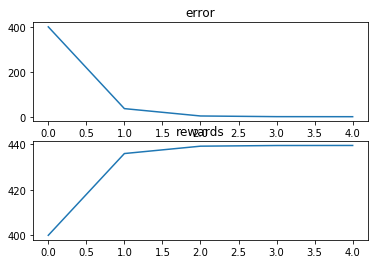

In [ ]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
gamma = 0.1
vi = mdp.ValueIteration(P, R, gamma, epsilon=0.001,max_iter = 100000)
vi.setVerbose()
result,error,reward = vi_plot(vi)
sum(vi.policy)

In [ ]:
len(vi.policy)

400

In [ ]:
sum(vi.policy)

336

In [ ]:
sum(vi.policy[-63:])

31

In [ ]:
[i['Max V'] for i in result]

[200.0,
 372.79999999999995,
 522.182144,
 651.25627904,
 762.8458931978239,
 859.2726022514278,
 942.6442510628593,
 1014.6940339375682,
 1076.995561350815,
 1130.8427641272779,
 1177.4104400723963,
 1217.6646030959641,
 1252.4823307964512,
 1282.5848405999259,
 1308.6269556555405,
 1331.1471465879827,
 1350.6343175717589,
 1367.4905128347543,
 1382.0807723256428,
 1394.705292392864,
 1405.6366429608233,
 1415.098985703211,
 1423.2958566266661,
 1430.3946526263683,
 1436.5473711754491,
 1441.8790296985599,
 1446.5031477609114,
 1450.5131022670625,
 1453.9936849396074,
 1457.014649092684,
 1459.6393373232986,
 1461.9198642800889,
 1463.90355727385,
 1465.629360304212,
 1467.132642017339,
 1468.4425113912266,
 1469.5854069192865,
 1470.5830928400594,
 1471.4553385059119,
 1472.2184226317336,
 1472.8871334859496,
 1473.4736523690333,
 1473.989046796937,
 1474.442437069155,
 1474.8421109691963,
 1475.1949016541873,
 1475.5070198157998,
 1475.7835893171532,
 1476.029268435848,
 1476.247903

In [ ]:
errors = [i['Error'] for i in result]

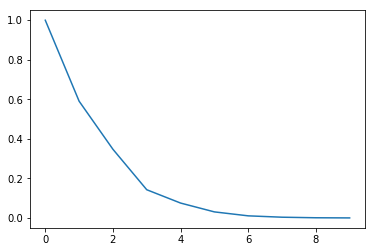

In [ ]:
plt.plot(errors)

In [ ]:
vi.V

(3.34216629799929,
 3.1244979594224764,
 3.0611419359850696,
 2.6429935755433616,
 2.7673979690391595,
 3.297219048138617,
 2.6640647141112677,
 3.054910745851874,
 2.660934948723211,
 2.931907896421391)

In [ ]:
vi.policy

(0, 0, 2, 1, 1, 2, 1, 1, 1, 2)

In [ ]:
vi.iter

16

In [ ]:
sum([vi.policy[i] == pi.policy[i] for i in range(len(vi.policy))])

487

In [ ]:
vi.policy[480:]==pi.policy[480:]

True

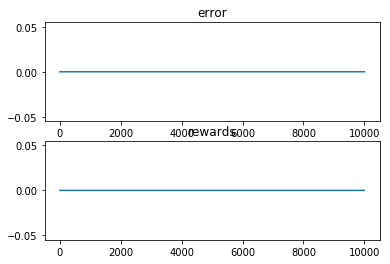

In [ ]:
n_iter = 100000
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,alpha = 1
                   ,run_stat_frequency=None)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)

In [ ]:
sum(ql.policy)

23

In [ ]:
ql.gamma**300

4.801422373777491e-06

In [ ]:
sum(ql.policy)

25

In [ ]:
sum(vi.policy)

458

In [ ]:
ql.Q

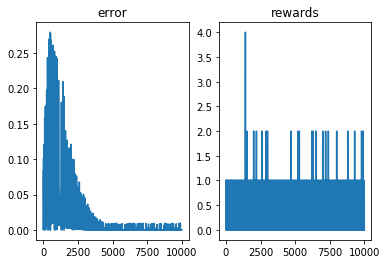

In [ ]:
n_iter = 10000
ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)

In [ ]:
max(ql.Q[0][:])

8.789817359825925

In [ ]:
max(ql.Q[1][:])

9.318637409519805

In [ ]:
p20000 = ql.policy

In [ ]:
p10000 = ql.policy

In [ ]:
p10000[:10]

(0, 1, 1, 1, 1, 1, 0, 0, 0, 0)

In [ ]:
import numpy as np

In [ ]:
np.where(ql_reward==1.0)

(array([], dtype=int64),)

In [ ]:
ql_reward[3]==1

True

In [ ]:
ql_reward.index(1)

1

In [ ]:
type(ql.policy)

tuple

In [ ]:
sum([ql.policy[i] == vi.policy[i] for i in range(len(ql.policy))])

43

In [ ]:
sum([ql.policy[i] == vi.policy[i] for i in range(len(ql.policy))])

36

In [ ]:
time = [i['Time'] for i in result]

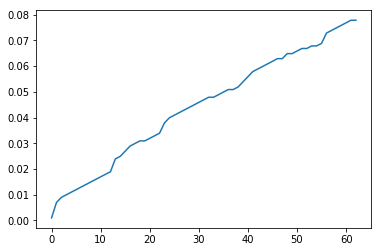

In [ ]:
plt.plot(time)

In [ ]:
gamma, alpha, alpha_decay, alpha_min, epsilon, epsilon_min, epsilon_decay, n_iter

In [ ]:
ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)


In [ ]:
max(vi.V)

36.68421799327019

In [ ]:
max(pi.V)

23.172433847048566

In [ ]:
max(ql.V)

9.012146178794062

In [ ]:
max(ql.Q[:,1])

9.012146178794062

In [ ]:
R

In [ ]:
def ql_hyper_tune(P=P,R=R,gamma=0.96, alpha=0.1, alpha_decay=.99, alpha_min=.001, epsilon=1.0, epsilon_min=0.1, 
                  epsilon_decay=0.99, n_iter=10000):
    ql = mdp.QLearning(P,R,gamma,n_iter)
    ql.run()
    return ql.policy
    
    

In [ ]:
results = []
for n_iter in [10000000,20000000]:
    #for gamma in [0.7,0.9,0.99]:
        results.append(ql_hyper_tune(n_iter=n_iter))

In [ ]:
pp, rr = example.forest(S=40, r1=400, r2=200, p=0.1, is_sparse=False)

In [ ]:
for r in results:
    print(sum([r[i] == vi.policy[i] for i in range(len(ql.policy))]))

45
53


In [ ]:
for r in results:
    print(sum([r[i] == vi.policy[i] for i in range(len(ql.policy))]))

50
46
48
43


In [ ]:
for r in results:
    print(sum([r[i] == vi.policy[i] for i in range(len(ql.policy))]))

45
42


In [ ]:
for r in results:
    print(sum([pi.policy[i] == vi.policy[i] for i in range(len(ql.policy))]))

396
396


169
170.49969053268433


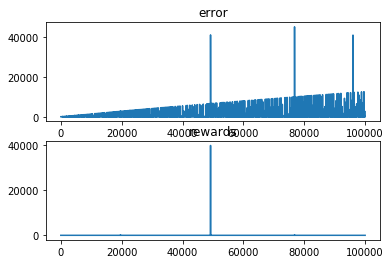

In [ ]:
import time
start = time.time()
n_iter = 100000
ql = mdp.QLearning(pp, rr, 0.999999996 , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=100)
ql.setVerbose()
higherre=ql.run()
ql_result,ql_error,ql_reward = vi_plot(higherre)
print(sum(ql.policy))
print(time.time()-start)

In [ ]:
sum(ql.policy)

169

 Iteration   Variation
         140000.000000
         235999.999856
         332399.999741
         429159.999650
         526243.999580
         623619.599528
         721257.639490
         819131.875464
         917218.687849
        1015496.819002
        1113947.137046
        1212552.423291
        1311297.180917
        1410167.462785
        15 9150.716470
        16 8235.644790
        17 7412.080281
        18 6670.872226
        19 6003.784980
        20 5403.406460
        21 4863.065795
        22 4376.759198
        23 3939.083262
        24 3545.174922
        25 3190.657417
        26 2871.591664
        27 2584.432487
        28 2325.989229
        29 2093.390298
        30 1884.051260
        31 1695.646128
        32 1526.081509
        33 1373.473352
        34 1236.126012
        35 1112.513406
        36 1001.262062
        37  901.135852
        38  811.022264
        39  729.920034
        40  656.928028
        41  591.235223
        42  532.111699
        43 

292

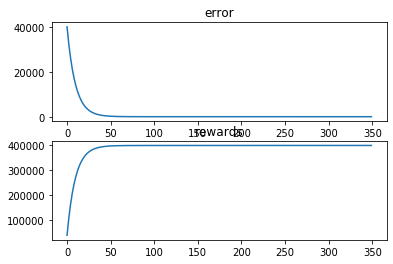

In [ ]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
gamma = 0.999999996
vi = mdp.ValueIteration(pp, rr, gamma, epsilon=0.001,max_iter = 100000)
vi.setVerbose()
rv = vi.run()
result,error,reward = vi_plot(rv)
sum(vi.policy)

In [ ]:
len(ql.policy)

400

In [ ]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
gamma = 0.999999996
vi = mdp.ValueIteration(P, R, gamma, epsilon=0.001,max_iter = 100000)
vi.setVerbose()
result = vi.run()
result,error,reward = vi_plot(result)
sum(vi.policy)

 Iteration   Variation
         1           2
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           1
        10           1
        11           1
        12           1
        13           1
        14           1
        15           1
        16           1
        17           1
        18           1
        19           1
        20           1
        21           1
        22           1
        23           1
        24           1
        25           1
        26           1
        27           1
        28           1
        29           1
        30           1
        31           1
        32           1
        33           1
        34           1
        35           1
        36           1
        37           1
        38           1
        39           1
        40           1
        41           1
        42           1
        43 

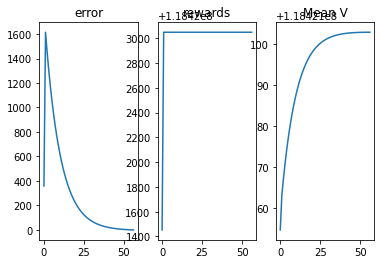

In [11]:
gamma = 0.999999996
P, R = example.forest(S=400, r1=200, r2=400, p=0.1, is_sparse=False)
pi = mdp.PolicyIteration(P, R, gamma)
pi.setVerbose()
pi_result = pi.run()
pi_result,pi_error,pi_reward = vi_plot(pi_result)

 Iteration   Variation
         1  400.000000
         2  358.999999
         3  322.999997
         4  289.789997
         5  260.629996
         6  233.729895
         7  210.110295
         8  188.321214
         9  169.189338
        10  151.540182
        11  136.043362
        12  121.747546
        13  109.195123
        14   97.615512
        15   87.448049
        16   78.068564
        17   69.832919
        18   62.235536
        19   55.564664
        20   49.410784
        21   44.007377
        22   39.022735
        23   34.645975
        24   30.608415
        25   27.063240
        26   23.792816
        27   20.921224
        28   18.272181
        29   15.946191
        30   13.800466
        31   11.916415
        32   10.178378
        33    8.652296
        34    7.244486
        35    6.008360
        36    4.868033
        37    4.005048
        38    3.604543
        39    3.244089
        40    2.919680
        41    2.627712
        42    2.364941
        43 

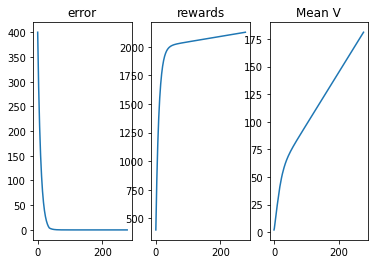

In [12]:
gamma = 0.999999996
P, R = example.forest(S=400, r1=200, r2=400, p=0.1, is_sparse=False)
vi = mdp.ValueIteration(P, R, gamma)
vi.setVerbose()
vi_result = vi.run()
vi_result,vi_error,vi_reward = vi_plot(vi_result)

In [ ]:
gamma = 0.999999996

pi = mdp.PolicyIteration(P, R, gamma)
pi.setVerbose()
pi_result = pi.run()
pi_result,pi_error,pi_reward = vi_plot(pi_result)
sum(pi.policy)

Text(0.5, 1.0, 'VI, PI Delta convergence Plot')

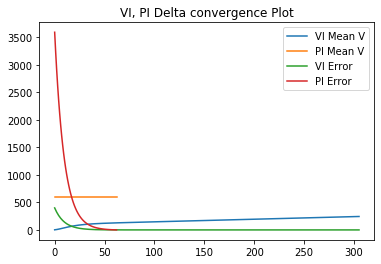

In [ ]:
vi_meanv = [i['Mean V'] for i in result]
pi_meanv = [i['Mean V']/200000 for i in pi_result]
vi_error = [i['Error'] for i in result]
pi_error = [i['Error'] for i in pi_result]
vi_time = [i['Time'] for i in result]
pi_time = [i['Time'] for i in pi_result]

plt.plot(vi_meanv,label = 'VI Mean V')
plt.plot(pi_meanv,label = 'PI Mean V')
plt.plot(vi_error,label = 'VI Error')
plt.plot(pi_error,label = 'PI Error')
plt.plot()
plt.legend(loc='best')
plt.title('VI, PI Delta convergence Plot')

In [ ]:
rr

In [ ]:
vi_time

In [ ]:
vi_meanv

Text(0.5, 1.0, 'VI Mean V vs time')

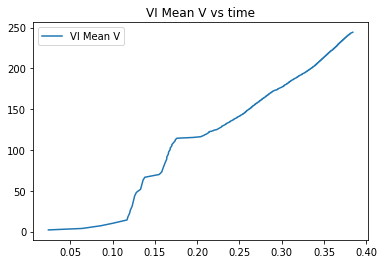

In [ ]:
plt.plot(vi_time,vi_meanv,label = 'VI Mean V')
#plt.plot(pi_time,pi_meanv,label = 'PI Mean V')
# plt.plot(vi_error,label = 'VI Error')
# plt.plot(pi_error,label = 'PI Error')
plt.plot()
plt.legend(loc='best')
plt.title('VI Mean V vs time')

Text(0.5, 1.0, 'PI Mean V vs time')

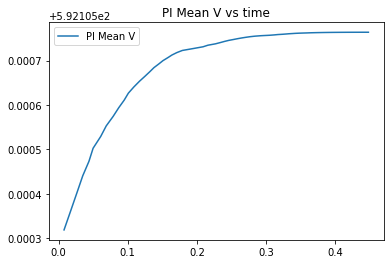

In [ ]:
#plt.plot(vi_time,vi_meanv,label = 'VI Mean V')
plt.plot(pi_time,pi_meanv,label = 'PI Mean V')
# plt.plot(vi_error,label = 'VI Error')
# plt.plot(pi_error,label = 'PI Error')
plt.plot()
plt.legend(loc='best')
plt.title('PI Mean V vs time')

In [ ]:
pi_meanv

In [ ]:
pi_time

In [ ]:
pi_time

In [ ]:
sP, sR = example.forest(S=40, r1=40, r2=20, p=0.1, is_sparse=False)
bP, bR = example.forest(S=100, r1=40, r2=20, p=0.1, is_sparse=False)


 Iteration   Variation
         1   40.000000
         2   36.000000
         3   32.400000
         4   29.160000
         5   26.244000
         6   23.619600
         7   21.257639
         8   19.131875
         9   17.218688
        10   15.496819
        11   13.947137
        12   12.552423
        13   11.297181
        14   10.167463
        15    9.150716
        16    8.235645
        17    7.412080
        18    6.670872
        19    6.003785
        20    5.403406
        21    4.863066
        22    4.376759
        23    3.939083
        24    3.545175
        25    3.190657
        26    2.871592
        27    2.584432
        28    2.325989
        29    2.093390
        30    1.884051
        31    1.695646
        32    1.526082
        33    1.373473
        34    1.236126
        35    1.112513
        36    1.001262
        37    0.901136
        38    0.811022
        39    0.729920
        40    0.656928
        41    0.591235
        42    0.532112
        43 

0

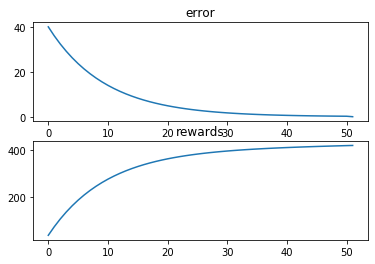

In [ ]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
gamma = 0.999999996
svi = mdp.ValueIteration(sP, sR, gamma, epsilon=0.001,max_iter = 100000)
svi.setVerbose()
sresult = svi.run()
result,error,reward = vi_plot(sresult)
# sum(vi.policy)

In [ ]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
gamma = 0.999999996
bvi = mdp.ValueIteration(bP, bR, gamma, epsilon=0.001,max_iter = 100000)
bvi.setVerbose()
bresult = bvi.run()
result,error,reward = bvi_plot(sresult)
sum(vi.policy)

Text(0.5, 1.0, 'small and large Delta convergence Plot')

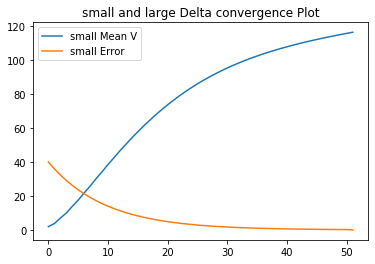

In [ ]:
vi_meanv = [i['Mean V'] for i in sresult]
pi_meanv = [i['Mean V'] for i in bresult]
vi_error = [i['Error'] for i in sresult]
pi_error = [i['Error'] for i in bresult]
vi_time = [i['Time'] for i in sresult]
pi_time = [i['Time'] for i in bresult]

plt.plot(vi_meanv,label = 'small Mean V')
#plt.plot(pi_meanv,label = 'large Mean V')
plt.plot(vi_error,label = 'small Error')
#plt.plot(pi_error,label = 'large Error')
plt.plot()
plt.legend(loc='best')
plt.title('small and large Delta convergence Plot')

Text(0.5, 1.0, 'small and large Delta convergence Plot')

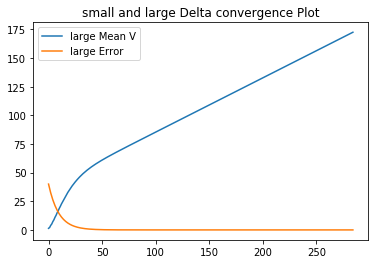

In [ ]:
vi_meanv = [i['Mean V'] for i in sresult]
pi_meanv = [i['Mean V'] for i in bresult]
vi_error = [i['Error'] for i in sresult]
pi_error = [i['Error'] for i in bresult]
vi_time = [i['Time'] for i in sresult]
pi_time = [i['Time'] for i in bresult]

#plt.plot(vi_meanv,label = 'small Mean V')
plt.plot(pi_meanv,label = 'large Mean V')
#plt.plot(vi_error,label = 'small Error')
plt.plot(pi_error,label = 'large Error')
plt.plot()
plt.legend(loc='best')
plt.title('small and large Delta convergence Plot')

In [ ]:
sresult[-1]

{'State': None,
 'Action': None,
 'Reward': 417.99655404644614,
 'Error': 1.4210854715202004e-13,
 'Time': 0.044945716857910156,
 'Max V': 417.99655404644614,
 'Mean V': 116.51847329521891,
 'Iteration': 52}

In [ ]:
bresult[-1]

{'State': None,
 'Action': None,
 'Reward': 530.0137595155325,
 'Error': 4.121147867408581e-12,
 'Time': 0.2799992561340332,
 'Max V': 530.0137595155325,
 'Mean V': 172.58223886011848,
 'Iteration': 285}